In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
financial_df = pd.read_csv('/Users/sa22/Documents/code/ML_financial_fraud/data/processed/transformed_dataset.csv')

financial_df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [3]:
financial_df = pd.get_dummies(financial_df, columns=['type'], drop_first=True)

# Logistic Regression

Accuracy: 1.00
Confusion Matrix:
 [[1588527      83]
 [   1325     720]]


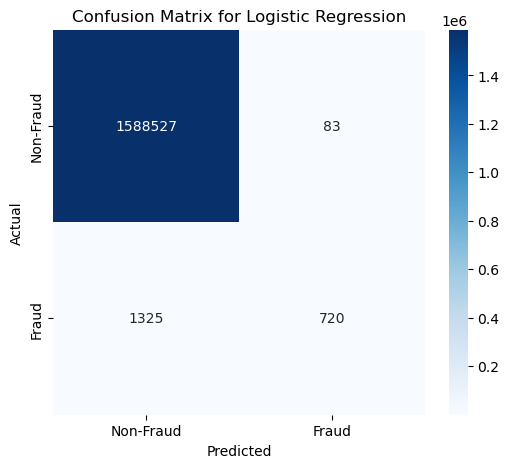

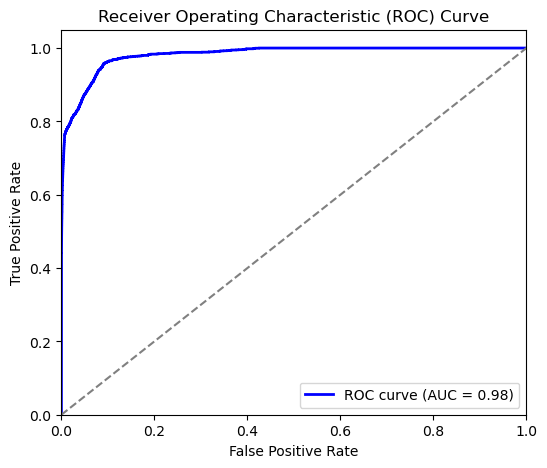

In [4]:
X = financial_df.drop(columns=['isFraud']).values # all columns except isFraud will be features
y = financial_df['isFraud'].values # isFraud is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

from sklearn.metrics import roc_curve, auc

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy of 1.0 is far too high. There are too many low false positives and high false negatives.

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)


Precision: 0.2080
Recall: 0.9040
F1-Score: 0.3381
Accuracy: 0.35
Confusion Matrix:
 [[ 558720 1029882]
 [      0    2053]]


0 fraud cases were missed even though the accuracy is only 20%.

# Naive Bayes

Accuracy: 0.36
Confusion Matrix:
 [[ 563703 1024899]
 [      2    2051]]


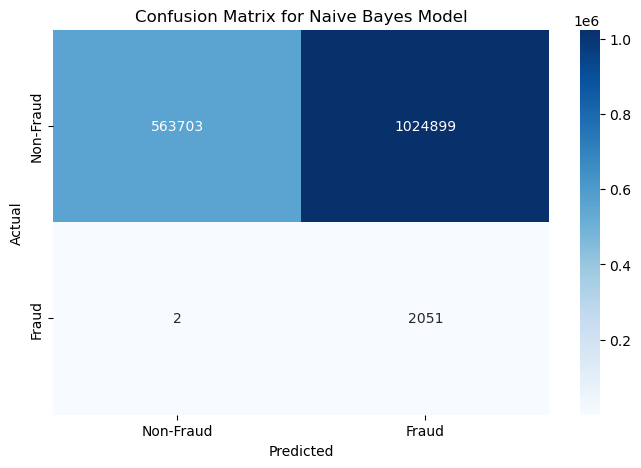

In [7]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

X = financial_df.drop(columns=['isFraud']).values
y = financial_df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_sm, y_train_sm)

y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy of .36 is very low and fraud cases were missed.

In [18]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Make predictions with the Naive Bayes model
y_prob = best_nb_model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (fraud)

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(precision + recall)]  # Maximizing both precision and recall
print(f"Optimal Threshold: {optimal_threshold}")

# Re-classify based on new threshold
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

# Evaluate model performance with new threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print(f'Accuracy (with new threshold): {accuracy:.2f}')
print('Confusion Matrix (with new threshold):\n', conf_matrix)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-Score with the new threshold
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

# Print the metrics
print(f'Precision (with new threshold): {precision_adjusted:.4f}')
print(f'Recall (with new threshold): {recall_adjusted:.4f}')
print(f'F1-Score (with new threshold): {f1_adjusted:.4f}')



Optimal Threshold: 8.101966505021628e-06
Accuracy (with new threshold): 0.35
Confusion Matrix (with new threshold):
 [[ 558720 1029882]
 [      0    2053]]
Precision (with new threshold): 0.0020
Recall (with new threshold): 1.0000
F1-Score (with new threshold): 0.0040


Although the accuracy is almost the same the false negatives are now zero, so no fraud cases were missed. It seems naive bayes is a very bad model for this data.

# KNN

Accuracy: 1.00
Confusion Matrix:
 [[1581533    7069]
 [    197    1856]]


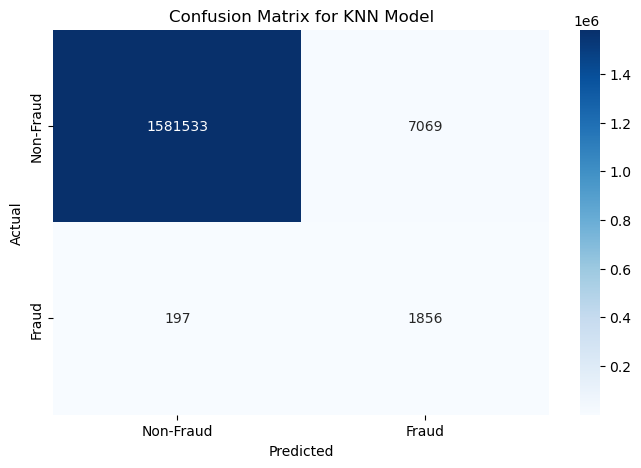

In [16]:
from sklearn.neighbors import KNeighborsClassifier

X = financial_df.drop(columns=['isFraud']).values
y = financial_df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_sm, y_train_sm)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This model show a 1.0 accuracy but of course it is deceptive as 197 cases of fraud were missed.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.2080
Recall: 0.9040
F1-Score: 0.3381


This model only has 20% precision but it correctly identified 90% of fraud cases. KNN doesn't seem like a good model for this either as the data is very imbalanced against fraud cases.